# Location Analysis
This is a data analysis on the location of dining for college students at George Mason University based on many factors including caloric intake, macronutrient information, and other interesting factors. In the analysis presented location is going to be our *independent* variable and we will be using the listed factors as our *dependent* variables.

# General Setup

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#reading in data from data file (dining location and macronutrient information)
data = pd.read_csv('data.csv',header=[0])
data

,USERID,DS1,DS2,DS3,DS4,DS5,DS7,DS8,DS9,DS10,...,A1,A2,A3,A4,A5,A6,A7,A8,A9,A12
0,1,4/13/22,2,m1,5:45:00 PM,3,1,0,0,0,...,88.50,377.30500,19.81200,8.24880,313.10500,43.16230,3.17950,18.0245,7.92630,16.0
1,1,4/13/22,2,m2,9:40:00 PM,5,1,0,0,0,...,367.25,599.03178,34.40398,7.26697,336.86758,50.18035,9.71593,6.9408,25.94335,113.7
2,1,4/14/22,3,m1,5:20:00 PM,4,9,5,9,0,...,28.00,106.72550,4.55250,3.90500,66.51050,15.28210,1.23940,11.8609,1.67540,1.1
3,1,4/14/22,3,m2,6:35:00 PM,5,1,0,0,0,...,464.73,767.21230,49.34390,7.36020,817.52090,71.92980,8.26050,19.4149,11.98130,113.7
4,1,4/14/22,3,m3,9:36:00 PM,6,1,1,1,0,...,0.00,160.00000,0.00000,0.00000,10.00000,25.00000,0.00000,10.0000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,41,5/8/22,4,m2,12:00:00 PM,3,3,4,3,0,...,316.00,954.81000,44.50540,9.52880,2024.11000,100.35540,2.46800,15.9624,38.24420,5.4
3244,41,5/8/22,4,m3,8:00:00 PM,6,3,15,2,0,...,183.00,440.00000,17.00000,4.00000,1400.00000,41.00000,1.00000,6.0000,29.00000,2.0
3245,41,5/8/22,4,m4,9:00:00 PM,5,1,1,1,0,...,67.00,261.97000,11.99970,1.96710,180.23000,37.65400,0.20100,27.9993,2.00330,1.4
3246,41,5/9/22,3,m1,8:00:00 AM,1,1,0,0,0,...,0.00,255.00000,6.50000,2.25000,217.50000,37.00000,1.50000,27.0000,12.00000,15.0


Right now, let's begin with the relationship with eating location and pure caloric intake. Using the code below we can construct a scatterplot with the data we want to analyze just to see any trends.

/var/folders/wp/t9z10fyn0c5cm_wcytbbdlyw0000gp/T/ipykernel_9168/2345581753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DS7'][val]=9


Text(0.5, 0, 'Location')

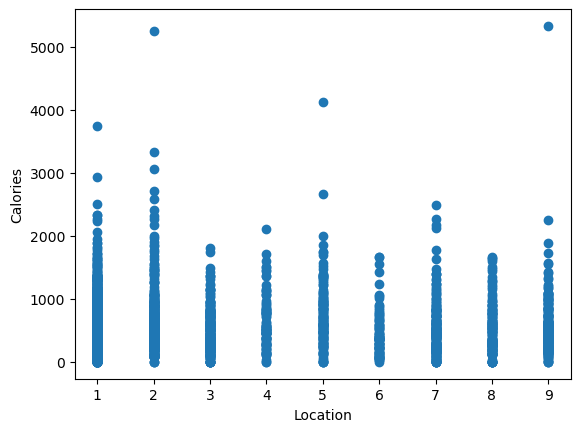

In [17]:
# not sufficient values for 'transit' point so it will be included into 'other' for this analysis.
for val in range(len(data['DS7'])):
    if data['DS7'][val]==10:
        data['DS7'][val]=9

x,y=(data['DS7'],data['A2'])
plt.scatter(x,y)
plt.ylabel('Calories')
plt.xlabel('Location')

By the looks of it our data is pretty similar in placement/distribution, so I think that our best bet here is to use ANOVA since our dependent value here is continuous and the independent is a  multinomial categorical value. But in order to see if we can use ANOVA we must confirm a few things:
* the dependent data is normally distributed
* the variances are homogeneous (they are equal b/n treatment groups)
* observations are sample independently from one another
* the dependent variable is continuous

Two of these are easy to determine. Point 3 and 4 hold true. I don't know straight away about the 1st and 2nd ones though so we need to look a little closer.

<AxesSubplot:ylabel='Frequency'>

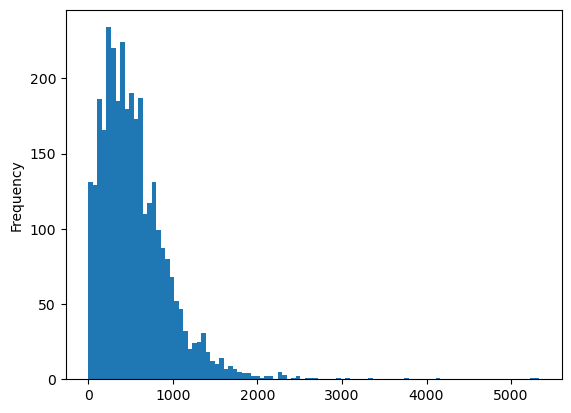

In [18]:
y.plot(kind="hist",bins=100)

Much like we determined in the data summary a lot of the data pertaining to the nutrient information is skewed to the right on the histogram which seem to indicate a non normal distribution. However we can fix this by taking the cubed root and transforming the caloric intake data. Below is how we are going to visualize this data with the ANOVA analysis.

/var/folders/wp/t9z10fyn0c5cm_wcytbbdlyw0000gp/T/ipykernel_9168/3738891489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['A2'][i]=data['A2'][i]**(1/3)


<AxesSubplot:ylabel='Frequency'>

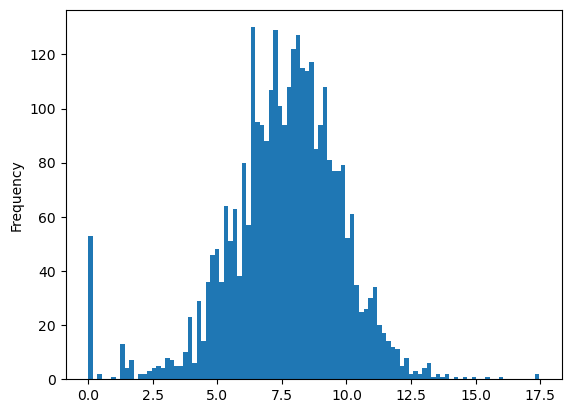

In [19]:
for i in range(len(data['A2'])):
    data['A2'][i]=data['A2'][i]**(1/3)
data['A2'].plot.hist(bins=100)

Even though the distribution here is considered normal one more step can be taken to ensure we deal with significant outliers in the data. The following boxplots and histogram show a before and after of removing outliers to help our results be as accurate and statistically significant as possible.

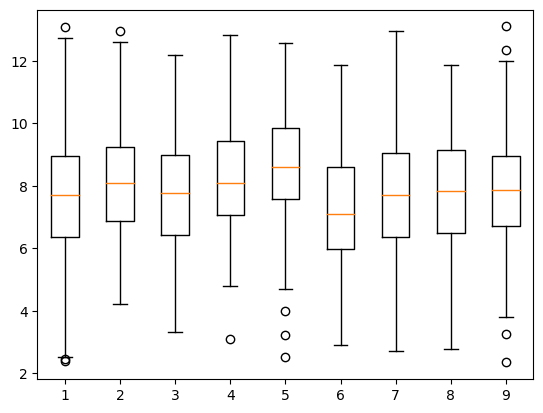

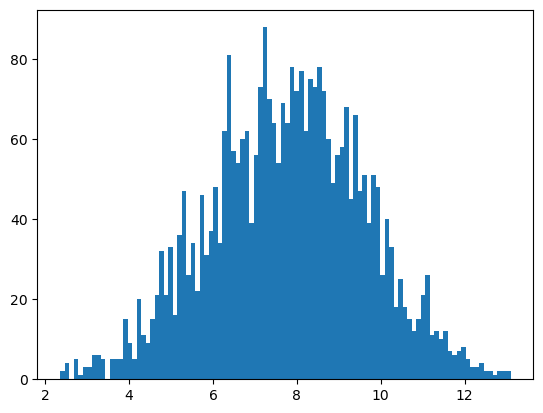

In [20]:
Q1 = data['A2'].quantile(0.25)
Q3 = data['A2'].quantile(0.75)
iqr = Q3-Q1
ul = Q3+1.5*iqr
ll = Q1-1.5*iqr
outliers=[]

for i in range(len(data)):
    if data['A2'][i]>ul or data['A2'][i]<ll:
        outliers.append(i)

new_data=data.drop(outliers)
plt.boxplot([new_data[new_data['DS7']==val+1]['A2'] for val in range(9)])
plt.show()
plt.hist(new_data['A2'],bins=100)
plt.show()

# ANOVA Analysis (General Calories)
The first way we are going to analyze the caloric intake's relationship with location is looking into general caloric intake among participants.

In [21]:
import scipy.stats as stats
import statistics

print('Homogeneity Variance Test')
f,p=stats.levene(new_data[new_data['DS7']==1]['A2'],new_data[new_data['DS7']==2]['A2'],
                 new_data[new_data['DS7']==3]['A2'],new_data[new_data['DS7']==4]['A2'],
                 new_data[new_data['DS7']==5]['A2'],new_data[new_data['DS7']==6]['A2'],
                 new_data[new_data['DS7']==7]['A2'],new_data[new_data['DS7']==8]['A2'],
                 new_data[new_data['DS7']==9]['A2'])
print(str(p)+' > 0.05 ?\n')

print('ANOVA Results')
f_value,p_value=stats.f_oneway(new_data[new_data['DS7']==1]['A2'],new_data[new_data['DS7']==2]['A2'],
                               new_data[new_data['DS7']==3]['A2'],new_data[new_data['DS7']==4]['A2'],
                               new_data[new_data['DS7']==5]['A2'],new_data[new_data['DS7']==6]['A2'],
                               new_data[new_data['DS7']==7]['A2'],new_data[new_data['DS7']==8]['A2'],
                               new_data[new_data['DS7']==9]['A2'])
print('f-value:',f_value)
print("p-value:",p_value)

stat_dict={}
for i in range(9):
    stat_dict['loc ' + str(i+1)]=[statistics.mean(new_data[new_data['DS7']==i+1]['A2']),
                                  statistics.stdev(new_data[new_data['DS7']==i+1]['A2']),
                                  statistics.variance(new_data[new_data['DS7']==i+1]['A2'])]
print('\nBasic Information of Each Group')
results=pd.DataFrame(stat_dict,index=['mean','stdev','variance'])
results

Variance Test
0.6796711341853645 > 0.05 ?

ANOVA Results
f-value: 7.354914427170451
p-value: 9.81246463051727e-10

Basic Information of Each Group


,loc 1,loc 2,loc 3,loc 4,loc 5,loc 6,loc 7,loc 8,loc 9
mean,7.663037,8.085497,7.685789,8.229089,8.599258,7.198004,7.717380,7.807782,7.817116
stdev,1.831661,1.792343,1.758286,1.905779,1.895604,2.037465,1.973561,1.868258,1.747686
variance,3.354983,3.212495,3.091570,3.631995,3.593313,4.151264,3.894944,3.490388,3.054406


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

test=pd.DataFrame({'DS7':new_data['DS7'],'A2':new_data['A2']})

print('General Analysis')
model=ols('A2~DS7',data=test).fit()
print(sm.stats.anova_lm(model,typ=2))

General Analysis
                sum_sq      df         F    PR(>F)
DS7           7.696108     1.0  2.244017  0.134233
Residual  10775.841245  3142.0       NaN       NaN


# ANOVA Analysis (Individual Analysis)
The second way we are going to analyze the caloric intake's relationship with location is through an individual analysis of each participant.

[]

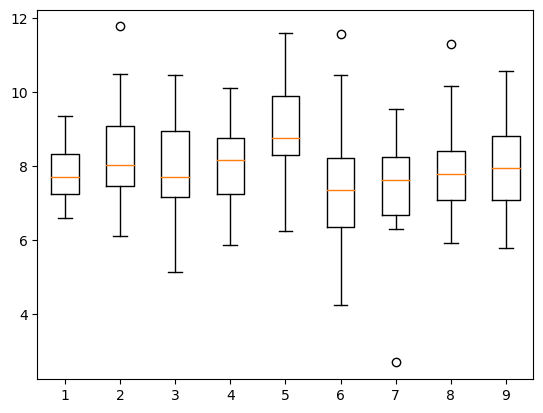

In [23]:
individuals=[]
for i in range(9):
    loc_list=[]
    for j in range(41):
        value=new_data[(new_data['USERID']==j+1) & (new_data['DS7']==i+1)]['A2'].mean()
        if not np.isnan(value):
            loc_list.append(value)
    individuals.append(loc_list)

plt.boxplot(individuals)
plt.plot()

In [24]:
print('Homogeneity Variance Test')
f,p=stats.levene(individuals[0],individuals[1],
                 individuals[2],individuals[3],
                 individuals[4],individuals[5],
                 individuals[6],individuals[7],
                 individuals[8])
print(str(p)+' > 0.05 ?\n')

print('ANOVA Results')
f_value,pvalue=stats.f_oneway(individuals[0],individuals[1],
                              individuals[2],individuals[3],
                              individuals[4],individuals[5],
                              individuals[6],individuals[7],
                              individuals[8])
print('f-value:',f_value)
print("p-value:",p_value)

stat_dict={}
for i in range(9):
    stat_dict['loc ' + str(i+1)]=[statistics.mean(individuals[i]),statistics.stdev(individuals[i]),statistics.variance(individuals[i])]

print('\nBasic Information of Each Group')
results=pd.DataFrame(stat_dict,index=['mean','stdev','variance'])
results

Variance Test
0.0514093890736513 > 0.05 ?

ANOVA Results
f-value: 3.8664437523446193
p-value: 9.81246463051727e-10

Basic Information of Each Group


,loc 1,loc 2,loc 3,loc 4,loc 5,loc 6,loc 7,loc 8,loc 9
mean,7.726721,8.254846,7.928997,8.060263,8.963377,7.456807,7.460943,7.913681,8.019469
stdev,0.644498,1.489846,1.308512,1.120455,1.272309,1.631735,1.501010,1.160583,1.078662
variance,0.415378,2.219643,1.712205,1.255420,1.618769,2.662559,2.253032,1.346952,1.163512


# ANOVA Analysis (Day by Day Analysis)
The final way we are going to analyze the caloric intake's relationship with location is through an day by day analysis of a general overview of caloric intake and location.

[]

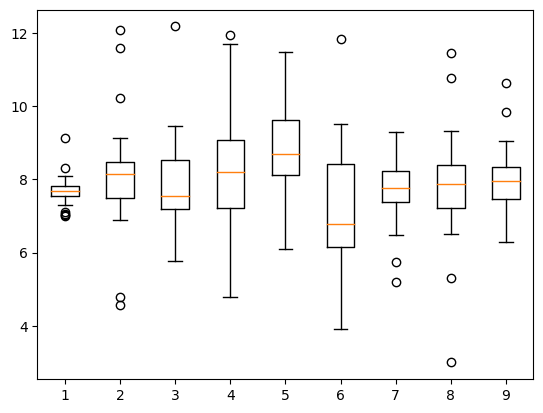

In [29]:
day_by_day=[]
for loc in range(9):
    loc_list=[]
    for day in new_data['DS1'].unique():
        value=new_data[(new_data['DS1']==day) & (new_data['DS7']==loc+1)]['A2'].mean()
        if not np.isnan(value):
            loc_list.append(value)
    day_by_day.append(loc_list)

plt.boxplot(day_by_day)
plt.plot()

In [32]:
print('Homogeneity Variance Test')
f,p=stats.levene(day_by_day[0],day_by_day[1],
                 day_by_day[2],day_by_day[3],
                 day_by_day[4],day_by_day[5],
                 day_by_day[6],day_by_day[7],
                 day_by_day[8])
print(str(p)+' > 0.05 ?\n')

print('ANOVA Results')
f_value,pvalue=stats.f_oneway(day_by_day[0],day_by_day[1],
                              day_by_day[2],day_by_day[3],
                              day_by_day[4],day_by_day[5],
                              day_by_day[6],day_by_day[7],
                              day_by_day[8])
print('f-value:',f_value)
print("p-value:",p_value)

stat_dict={}
for i in range(9):
    stat_dict['loc ' + str(i+1)]=[statistics.mean(day_by_day[i]),statistics.stdev(day_by_day[i]),statistics.variance(day_by_day[i])]

print('\nBasic Information of Each Group')
results=pd.DataFrame(stat_dict,index=['mean','stdev','variance'])
results

Homogeneity Variance Test
3.2404917873417046e-06 > 0.05 ?

ANOVA Results
f-value: 4.751118384303854
p-value: 9.81246463051727e-10

Basic Information of Each Group


,loc 1,loc 2,loc 3,loc 4,loc 5,loc 6,loc 7,loc 8,loc 9
mean,7.674511,8.130277,7.822657,8.210888,8.792314,7.241038,7.707534,7.791320,7.895915
stdev,0.346511,1.298563,1.199831,1.687343,1.204600,1.526401,0.870529,1.380768,0.848885
variance,0.120070,1.686266,1.439594,2.847127,1.451062,2.329900,0.757821,1.906521,0.720605
